# Reinforcement Learning : Qlearn
### From scratch

## Imports

In [37]:
from utilities.std_imports import *
from IPython.display import Image

The Q-Table is a simple lookup table to calculate the maximum expected future rewards for action at each state. 

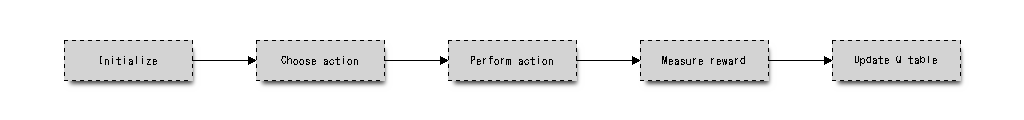

In [38]:
Image("diagrams/block_diagram.png")

Q Table definition:  
  
$ \large Q^{\pi}(s_t, a_t) = E[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... | s_t, a_t] $

Q Function iterative step is the weighted average of the old value and the new information:   
  
$ \large s_t $ : state at time t   
$ \large a_t $ : action at time t    
$ \large r_t $ : reward at time t  
$ \large \alpha $ : learning rate. Determines to what extent newly acquired information overrides old information      
$ \large \gamma $ : discount factor. Determines the importance of future rewards (0 is short-sighted, 1 long-sighted)   
  
$ \large Q(s_t, a_t) = (1-\alpha) \; Q(s_t, a_t) + \alpha \; [\; r_{t+1} + \gamma \max_a Q(s_{t+1}, a) \; ]$

## Function definitions

In [57]:
# Returns all available actions in the state given as an argument
def available_actions(state):
    state_row = R[state,]
    av_act = np.where(state_row >= 0)[1]
    return av_act

# Chooses at random which action to be performed within the range of all the available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Updates the Q matrix according to the path selected and the Q learning algorithm
def update(state, action, alpha, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    # Q learning formula
    #Q[state, action] = R[state, action] + gamma * max_value
    Q[state, action] = (1-alpha) * Q[state, action] + alpha * ( R[state, action] + gamma * max_value )

## Load data

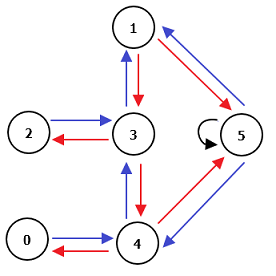

In [68]:
Image("diagrams/qlearning.png")

So here is a Graph where we want to find the best path. The reward matrix R is the adjacency matrix in this case.

In [64]:
# R matrix
R = np.matrix([ [-1,-1,-1,-1,0,-1],
        [-1,-1,-1,0,-1,100],
        [-1,-1,-1,0,-1,-1],
        [-1,0,0,-1,0,-1],
        [-1,0,0,-1,-1,100],
        [-1,0,-1,-1,0,100] ])

# Q matrix
Q = np.matrix(np.zeros([6,6]))

# Gamma (learning parameter).
alpha = 0.4
gamma = 0.8
R

matrix([[ -1,  -1,  -1,  -1,   0,  -1],
        [ -1,  -1,  -1,   0,  -1, 100],
        [ -1,  -1,  -1,   0,  -1,  -1],
        [ -1,   0,   0,  -1,   0,  -1],
        [ -1,   0,   0,  -1,  -1, 100],
        [ -1,   0,  -1,  -1,   0, 100]])

## Initialization

In [59]:
# Initial state. (Usually to be chosen at random)
initial_state = 1

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# Update Q matrix
update(initial_state, action, alpha, gamma)

## Train

In [61]:
# Train over 10 000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state, action, alpha, gamma)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:\n", Q/np.max(Q) * 100)

Trained Q matrix:
 [[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


### Run and print results

In [62]:
# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:\n", steps)

Selected path:
 [2, 3, 1, 5]


## Credits & Links

https://firsttimeprogrammer.blogspot.com/2016/09/getting-ai-smarter-with-q-learning.html#more